# Cats & Dogs classification model

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import os
from sklearn import svm
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm


### Visualizing some data

path:  PetImages/Cat
(375, 500)


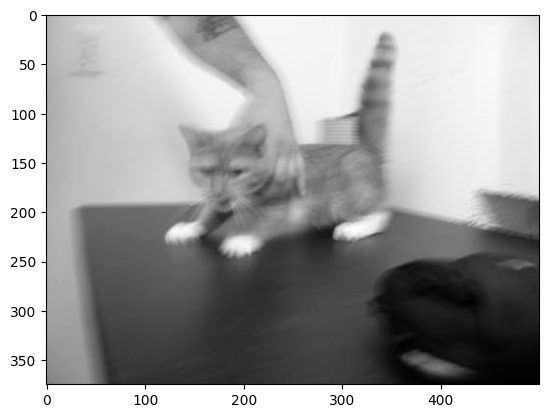

(281, 300)


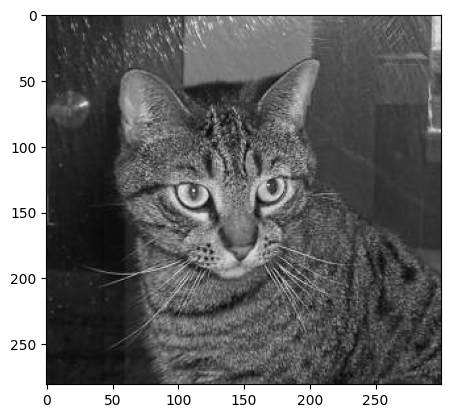

(500, 489)


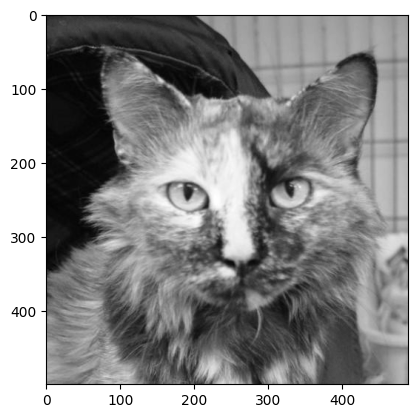

(500, 403)


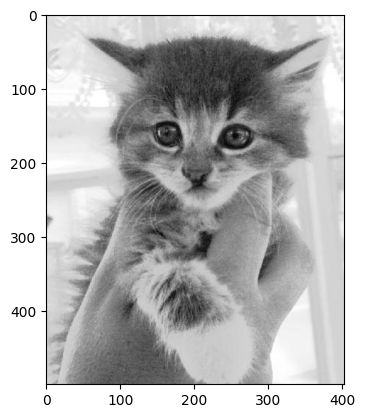

path:  PetImages/Dog
(375, 500)


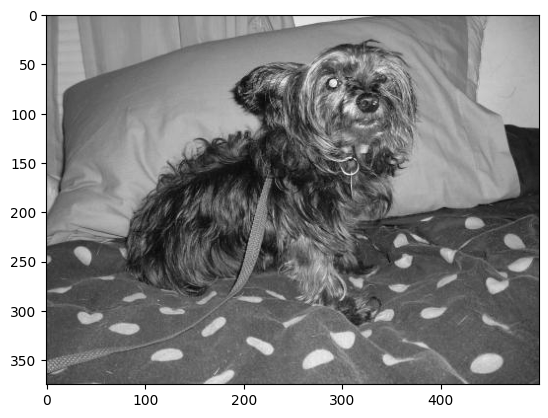

(500, 327)


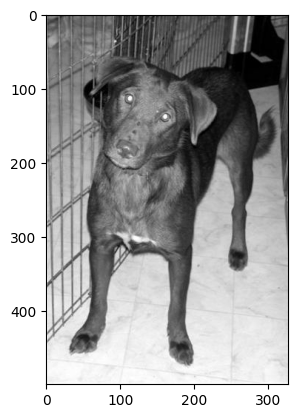

(293, 269)


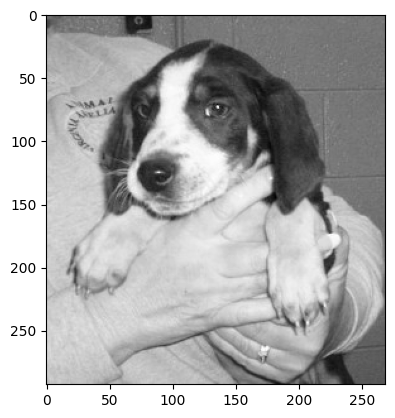

(398, 500)


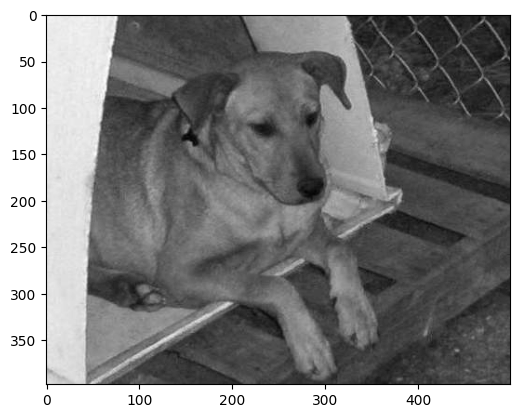

In [2]:
categories = ["Cat", "Dog"]
dataDir = "PetImages/"
for i in categories:
    path = os.path.join(dataDir, i)
    print("path: ", path)
    x = 0
    for img in os.listdir(path):
        x += 1
        if x == 5:
            break
        img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        print(img_array.shape)
        plt.show()
        

### checking the best imgSize

In [3]:
imgSize = 150

new_array = cv.resize(img_array, (imgSize, imgSize))
new_array = np.array(new_array)
print(new_array.shape)
new_array = new_array.flatten()

# plt.imshow(new_array, cmap="gray")
# plt.show()

(150, 150)


### Creating the training data

In [8]:
training_data = []
def create_training_data():
    for category in categories:
        path = os.path.join(dataDir, category)
        class_num = categories.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                img_resized = cv.resize(img_array, (imgSize, imgSize))
                img_flat = img_resized.flatten()
                training_data.append([img_resized.flatten(), class_num])
                
            except Exception as e:
                pass
                
create_training_data()              
            

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:09<00:00, 1266.46it/s]


In [9]:
print(training_data[0])
print(len(training_data))

[array([167, 171, 174, ...,   1,   1,   1], dtype=uint8), 0]
24946


In [84]:
# import random 
# random.shuffle(training_data)
# for i in training_data[:10]:
#     print(i[1])

0
1
1
0
0
0
1
0
0
0


### Separate input features and targets.

In [85]:
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)


(24946, 22500)
(24946,)


### Splitting the data into training and testing sets 

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [88]:
# Defining the parameters grid for GridSearchCV 
param_grid={'C':[0.1,1,10,100], 
            'gamma':[0.0001,0.001,0.1,1], 
            'kernel':['rbf','poly']} 

svc = svm.SVC(probability=True)

model = GridSearchCV(svc, param_grid)

In [ ]:
 model.best_estimator_

In [ ]:
# Training the model using the training data 
model.fit(x_train,y_train)

# save the model
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 
  
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))